# **Classificação com PyCaret**

---
## Importação e Preparação dos Dados

Vamos utilizar uma biblioteca que é considerada para fazer ML automática. Para isso temos que instalar a biblioteca 

_pycaret_ (algumas vezes pode dar problema na instalação, para meu caso so funcionou a instalação de uma versão anterior v2.3.10)

Lembrete: 
* instalar pycaret
* comentar e 
* reiniciar ambiente de excecução

In [ ]:
#!pip install pycaret==2.3.10 markupsafe==2.0.1 pyyaml==5.4.1 -qq

In [ ]:
from pycaret.datasets import get_data
dados = get_data('insurance') 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


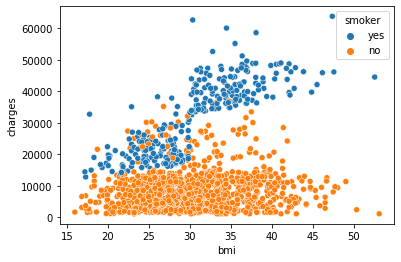

In [ ]:
import seaborn as sns
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);

## Objetivo: construir um modelo para detectar fumantes e possíveis fraudadores dessa variável

A biblioteca pycaret tem uma função que permite fazer a classificaão usando uma serie de parâmetros que temos que definir:

* setup
* models
* create model
* ...

In [ ]:
from pycaret.classification import setup, models, create_model, tune_model, \
                               compare_models, blend_models, stack_models, \
                               predict_model, evaluate_model, \
                               finalize_model, save_model, load_model

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


Na função setup temos que definir os dados e a variável alvo. 

Tem muitos (quase 60) argumentos por default, vamos a normalizar (colocamos TRUE)

Lembrar: Importante verificar a multicolinearidade

A engenharia de dados, não pode ser feita automaticamente!!!

In [ ]:
classificacao = setup(data = dados,
                      target = 'smoker',
                      normalize = True)

,Description,Value
0,session_id,8718
1,Target,smoker
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(1338, 7)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


De toda esta seleção de modelos, podemos escolher o que nos interessa. A forma de chamar é utilizando o identificador. 

In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


**Lembrando as Metricas:**

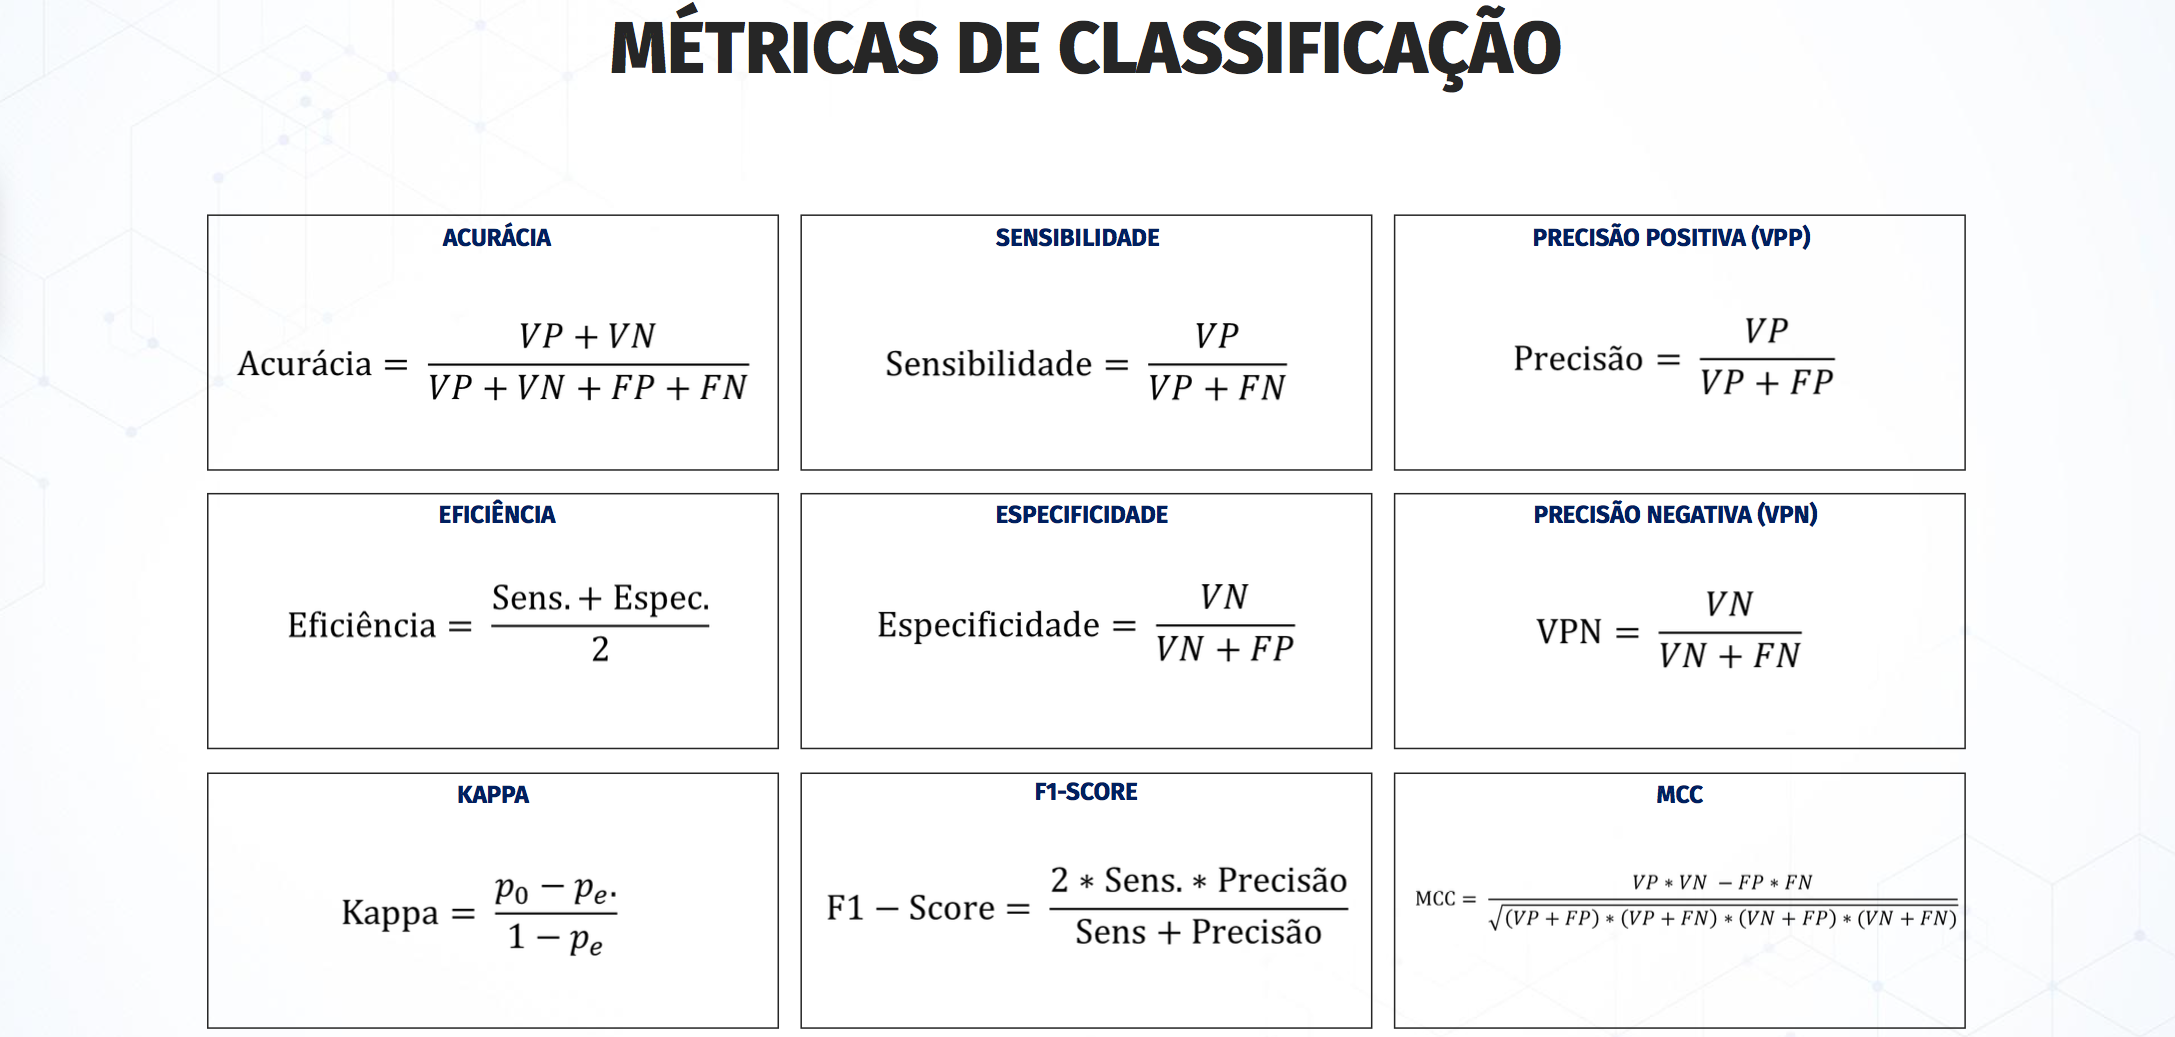

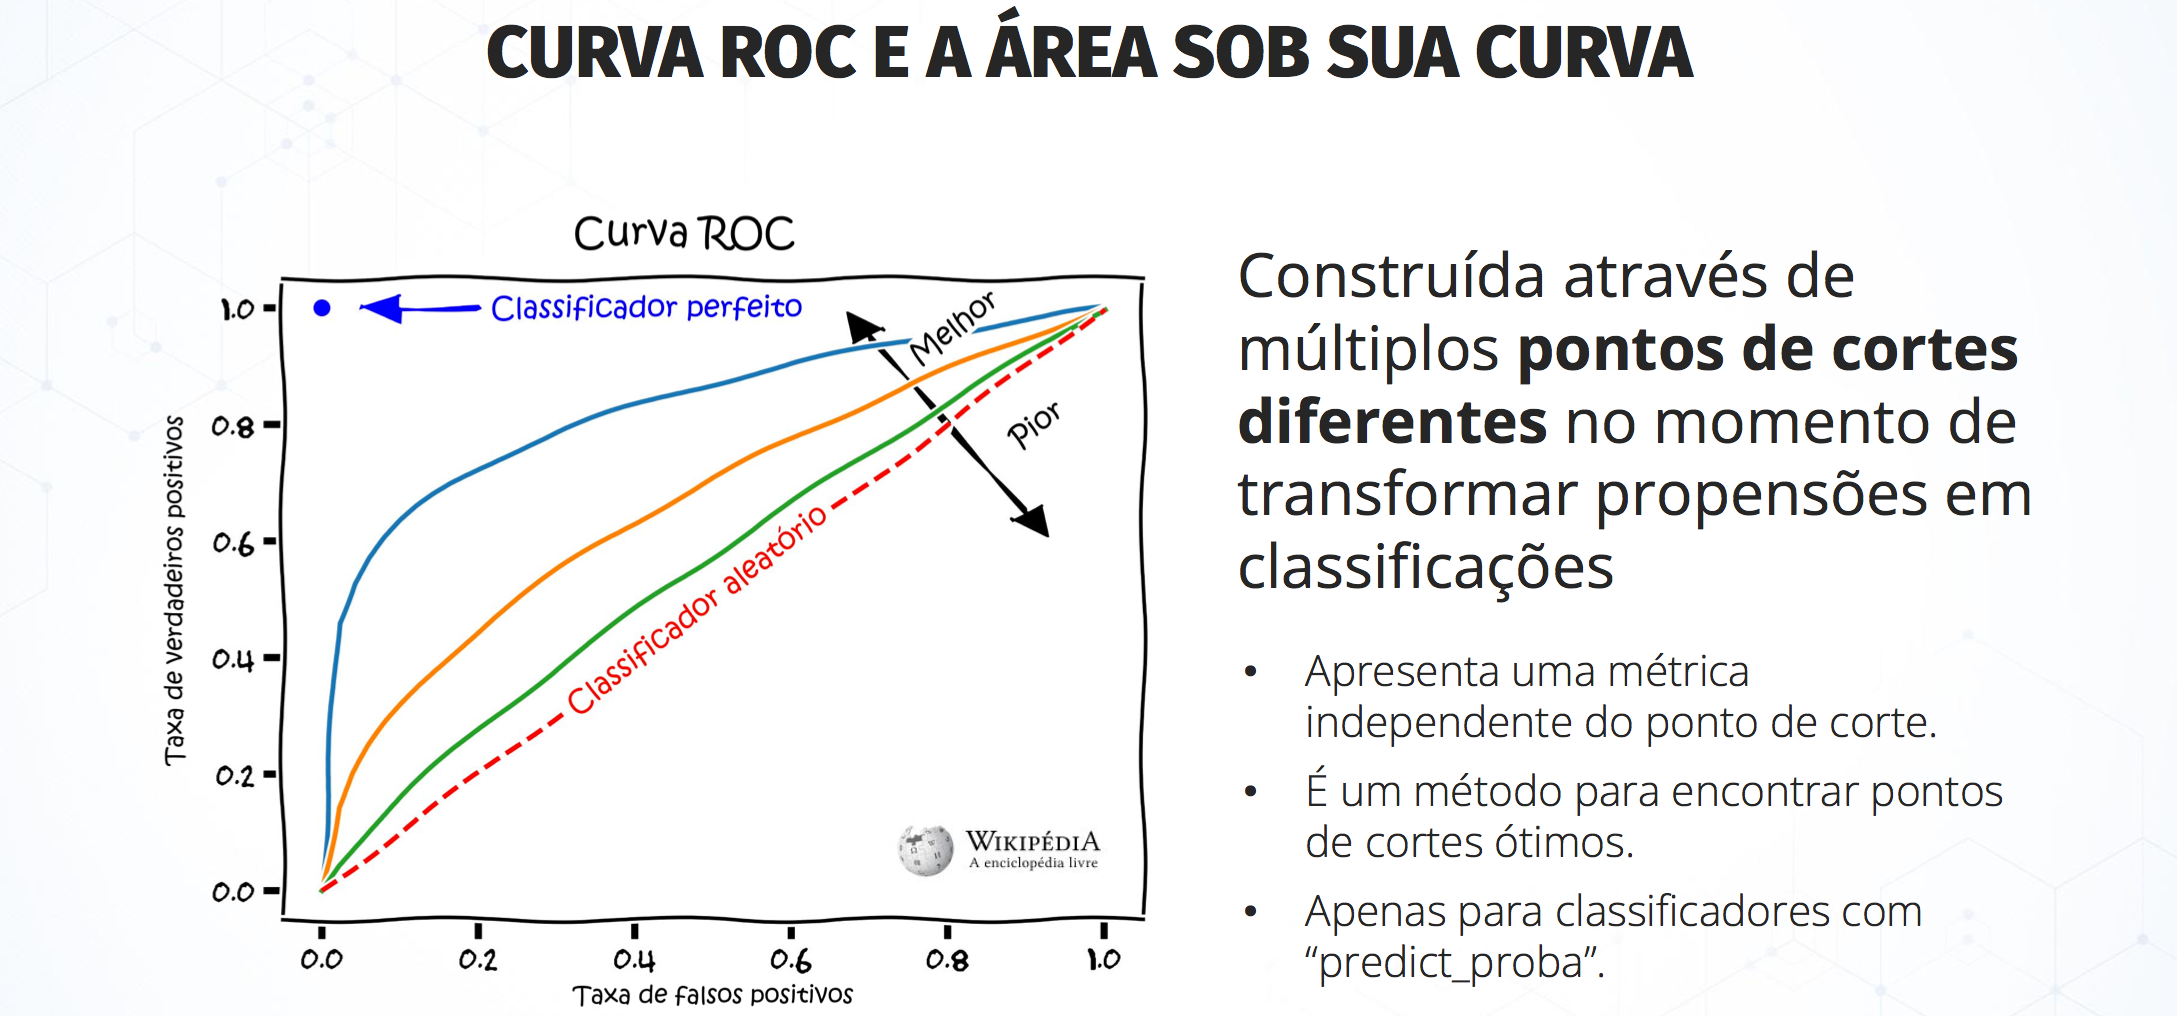

Podemos comparar os modelos que aparecem, ja que o pycaret tem a função  _compare_models_ e va selecionar com _n_select_ = 3,  os 3 melhores em função ao valor da acurácia

In [ ]:
melhores = compare_models(n_select = 3, sort = 'Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9605,0.9899,0.9105,0.9055,0.9049,0.8801,0.8825,0.137
lightgbm,Light Gradient Boosting Machine,0.9605,0.9910,0.9316,0.8867,0.9066,0.8817,0.8837,0.090
ada,Ada Boost Classifier,0.9573,0.9874,0.9158,0.8873,0.8984,0.8715,0.8739,0.150
lr,Logistic Regression,0.9562,0.9880,0.9105,0.8846,0.8950,0.8674,0.8694,0.641
dt,Decision Tree Classifier,0.9551,0.9228,0.8684,0.9074,0.8868,0.8589,0.8597,0.026
svm,SVM - Linear Kernel,0.9541,0.0000,0.9158,0.8695,0.8887,0.8600,0.8629,0.035
rf,Random Forest Classifier,0.9540,0.9892,0.9211,0.8661,0.8898,0.8609,0.8638,0.634
knn,K Neighbors Classifier,0.9370,0.9815,0.7842,0.8970,0.8308,0.7927,0.7994,0.162
et,Extra Trees Classifier,0.9370,0.9825,0.8105,0.8696,0.8347,0.7961,0.7999,0.459
lda,Linear Discriminant Analysis,0.9348,0.9831,0.8421,0.8408,0.8397,0.7988,0.8002,0.016


Do melhor modelo podemos fazer o teste e ver os resultados

In [ ]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9468,0.9881,0.8421,0.8889,0.8649,0.8318,0.8323
1,0.9574,0.9937,0.9474,0.8571,0.9000,0.8731,0.8748
2,0.9149,0.9628,0.9474,0.7200,0.8182,0.7640,0.7762
3,0.9681,0.9902,0.9474,0.9000,0.9231,0.9030,0.9034
4,0.9574,0.9979,0.9474,0.8571,0.9000,0.8731,0.8748
5,0.9787,0.9951,0.9474,0.9474,0.9474,0.9340,0.9340
6,0.9892,1.0000,1.0000,0.9500,0.9744,0.9676,0.9681
7,0.9677,0.9979,0.8947,0.9444,0.9189,0.8988,0.8993
8,0.9570,0.9886,0.9474,0.8571,0.9000,0.8727,0.8745


Tunando o melhor modelo

In [ ]:
lightgbm_tunado = tune_model(lightgbm, optimize = 'Accuracy', n_iter = 20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9468,0.9888,0.8421,0.8889,0.8649,0.8318,0.8323
1,0.9681,0.9944,0.9474,0.9000,0.9231,0.9030,0.9034
2,0.9149,0.9656,0.8947,0.7391,0.8095,0.7554,0.7611
3,0.9681,0.9839,0.9474,0.9000,0.9231,0.9030,0.9034
4,0.9787,0.9958,1.0000,0.9048,0.9500,0.9365,0.9384
5,0.9681,0.9958,0.8947,0.9444,0.9189,0.8991,0.8996
6,0.9892,0.9979,1.0000,0.9500,0.9744,0.9676,0.9681
7,0.9785,0.9972,0.8947,1.0000,0.9444,0.9312,0.9334
8,0.9677,0.9922,0.9474,0.9000,0.9231,0.9027,0.9032


Podemos combinar o melhores modelos (n_select = 3) usando a função _blend_models_

In [ ]:
modelo_combinado = blend_models(melhores, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9468,0.9895,0.8421,0.8889,0.8649,0.8318,0.8323
1,0.9574,0.9944,0.9474,0.8571,0.9000,0.8731,0.8748
2,0.9149,0.9684,0.9474,0.7200,0.8182,0.7640,0.7762
3,0.9681,0.9902,0.9474,0.9000,0.9231,0.9030,0.9034
4,0.9894,0.9986,1.0000,0.9500,0.9744,0.9677,0.9682
5,0.9787,0.9944,0.9474,0.9474,0.9474,0.9340,0.9340
6,0.9892,1.0000,1.0000,0.9500,0.9744,0.9676,0.9681
7,0.9785,0.9957,0.8947,1.0000,0.9444,0.9312,0.9334
8,0.9570,0.9872,0.9474,0.8571,0.9000,0.8727,0.8745


In [ ]:
modelo_stack = stack_models(melhores)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9574,0.9916,0.8947,0.8947,0.8947,0.8681,0.8681
1,0.9681,0.9951,0.9474,0.9000,0.9231,0.9030,0.9034
2,0.9149,0.9614,0.9474,0.7200,0.8182,0.7640,0.7762
3,0.9681,0.9895,0.9474,0.9000,0.9231,0.9030,0.9034
4,0.9894,0.9986,1.0000,0.9500,0.9744,0.9677,0.9682
5,0.9894,0.9965,1.0000,0.9500,0.9744,0.9677,0.9682
6,0.9892,0.9964,1.0000,0.9500,0.9744,0.9676,0.9681
7,0.9785,0.9993,0.8947,1.0000,0.9444,0.9312,0.9334
8,0.9570,0.9879,0.9474,0.8571,0.9000,0.8727,0.8745


O melhores tunados:

In [ ]:
melhores_tunados = [tune_model(i) for i in melhores]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9574,0.9902,0.8947,0.8947,0.8947,0.8681,0.8681
1,0.9468,0.9902,0.8947,0.8500,0.8718,0.8383,0.8387
2,0.9255,0.9523,1.0000,0.7308,0.8444,0.7970,0.8140
3,0.9787,0.9902,1.0000,0.9048,0.9500,0.9365,0.9384
4,0.9894,1.0000,1.0000,0.9500,0.9744,0.9677,0.9682
5,0.9894,0.9965,1.0000,0.9500,0.9744,0.9677,0.9682
6,0.9892,0.9929,1.0000,0.9500,0.9744,0.9676,0.9681
7,0.9677,0.9957,0.8421,1.0000,0.9143,0.8946,0.8996
8,0.9677,0.9879,0.9474,0.9000,0.9231,0.9027,0.9032


Vamos testar a **Regressão Logistica**

In [ ]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9681,0.9937,0.8947,0.9444,0.9189,0.8991,0.8996
1,0.9787,0.9944,0.9474,0.9474,0.9474,0.9340,0.9340
2,0.9043,0.9607,0.8947,0.7083,0.7907,0.7297,0.7381
3,0.9681,0.9888,1.0000,0.8636,0.9268,0.9066,0.9105
4,0.9574,0.9944,0.8947,0.8947,0.8947,0.8681,0.8681
5,0.9681,0.9958,0.9474,0.9000,0.9231,0.9030,0.9034
6,0.9785,0.9936,1.0000,0.9048,0.9500,0.9363,0.9382
7,0.9570,0.9979,0.8421,0.9412,0.8889,0.8623,0.8644
8,0.9570,0.9886,0.8421,0.9412,0.8889,0.8623,0.8644


In [ ]:
lr_tunado = tune_model(lr, optimize = 'Accuracy', n_iter = 20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9787,0.9930,1.0,0.9048,0.9500,0.9365,0.9384
1,0.9894,0.9937,1.0,0.9500,0.9744,0.9677,0.9682
2,0.9043,0.9649,1.0,0.6786,0.8085,0.7478,0.7728
3,0.9574,0.9888,1.0,0.8261,0.9048,0.8777,0.8843
4,0.9681,0.9944,1.0,0.8636,0.9268,0.9066,0.9105
5,0.9681,0.9958,1.0,0.8636,0.9268,0.9066,0.9105
6,0.9785,0.9936,1.0,0.9048,0.9500,0.9363,0.9382
7,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
8,0.9677,0.9886,1.0,0.8636,0.9268,0.9063,0.9103


In [ ]:
modelo_combinado_2 = blend_models(melhores_tunados, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9574,0.9895,0.8947,0.8947,0.8947,0.8681,0.8681
1,0.9574,0.9888,0.8947,0.8947,0.8947,0.8681,0.8681
2,0.9255,0.9575,1.0000,0.7308,0.8444,0.7970,0.8140
3,0.9681,0.9909,0.9474,0.9000,0.9231,0.9030,0.9034
4,0.9894,0.9993,1.0000,0.9500,0.9744,0.9677,0.9682
5,0.9787,0.9965,0.9474,0.9474,0.9474,0.9340,0.9340
6,0.9892,0.9886,1.0000,0.9500,0.9744,0.9676,0.9681
7,0.9677,0.9943,0.8947,0.9444,0.9189,0.8988,0.8993
8,0.9355,0.9865,0.8421,0.8421,0.8421,0.8016,0.8016


In [ ]:
modelo_stack_2 = stack_models(melhores_tunados)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9681,0.9909,0.9474,0.9000,0.9231,0.9030,0.9034
1,0.9574,0.9937,0.8947,0.8947,0.8947,0.8681,0.8681
2,0.9362,0.9635,1.0000,0.7600,0.8636,0.8230,0.8362
3,0.9681,0.9888,1.0000,0.8636,0.9268,0.9066,0.9105
4,0.9894,0.9979,1.0000,0.9500,0.9744,0.9677,0.9682
5,0.9894,0.9965,1.0000,0.9500,0.9744,0.9677,0.9682
6,0.9892,0.9950,1.0000,0.9500,0.9744,0.9676,0.9681
7,0.9785,1.0000,0.8947,1.0000,0.9444,0.9312,0.9334
8,0.9355,0.9872,0.7895,0.8824,0.8333,0.7935,0.7954


In [ ]:
evaluate_model(lr_tunado)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
pred = predict_model(lr_tunado)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9577,0.9811,0.9762,0.8454,0.9061,0.879,0.8828


In [ ]:
pred

,age,bmi,charges,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,region_northeast,region_northwest,region_southeast,region_southwest,smoker,Label,Score
0,-1.230222,0.085323,1.899219,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,yes,yes,1.0000
1,-0.873790,1.916190,2.238909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,yes,yes,0.9988
2,-0.945077,-1.598878,-0.916750,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,no,no,0.9402
3,1.621230,0.202327,0.076326,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,no,no,0.9997
4,-1.158936,1.444878,-0.815396,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,no,no,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,1.407372,0.708246,2.010444,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,no,yes,0.9034
398,-0.802504,1.172966,-0.792875,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,no,no,1.0000
399,-0.160927,0.593714,-0.594494,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,no,no,1.0000
400,-0.232214,0.546747,-0.656652,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,no,no,0.9999


Queremos selecionar aqueles em que a resposta observada é não fumante, mas que nosso modelo indica que é fumante. Vamos ordenar o resultado pelo Score, pois quanto mais alto, maior a probabilidade ser fumante e, portanto, maior o risco de ser um fraudador. 

In [ ]:
possiveis_fraudadores = pred[(pred['Label'] == 'yes') & (pred['smoker'] == 'no')].sort_values(by = 'Score', ascending = False)
possiveis_fraudadores

,age,bmi,charges,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,region_northeast,region_northwest,region_southeast,region_southwest,smoker,Label,Score
339,-1.158936,-1.942474,0.715072,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,no,yes,0.9999
395,-1.087649,-1.201723,1.009952,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,no,yes,0.9998
169,-0.374786,-1.331910,1.203992,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,no,yes,0.9991
328,0.908367,-0.929812,1.182178,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,no,yes,0.9921
51,1.763803,-0.956179,1.440032,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,no,yes,0.9920
11,0.551936,-1.055056,1.107627,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,no,yes,0.9915
143,-1.016363,-0.909212,0.854299,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,no,yes,0.9904
148,-1.444081,-0.533481,0.791048,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,no,yes,0.9840
245,0.908367,-0.676028,1.087010,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no,yes,0.9799
154,-1.444081,0.428095,0.840891,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,no,yes,0.9563


---

In [ ]:
# Finalizando o modelo
modelo_final = finalize_model(lr_tunado)

In [ ]:
# Salvando o modelo
save_model(modelo_final, 'meu-melhor-modelo-para-smoker')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='smoker',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=6.212000000000001,
                                  

## Deploy Básico

Tendo determinado nosso melhor modelo, podemos calcular com novos valores (para novos clientes) se este novos clientes são ou não **Fumante**. Para isto criamos uma função baseada no modelo determinado, e insirindo os parâmetros (caraterísticas do cliente) obter o valor dos Custos.

* Primero chamamos (carregar) o modelo
* Definimos a função que tem como argumentos todas as variáveis do modelo
  * as variáveis son colocadas em um dicionario 
  * o dicionario é transformado em um DataFrame
  * chama a funcação predict (modelo, dados)  e usa o com o dicionario

* e usar!!!  

In [ ]:
# Deploy Básico
import pandas as pd
modelo = load_model('meu-melhor-modelo-para-smoker')

def DetectorDeFumante(age, sex, bmi, children, region, charges):
    dados0 = {'age': [age], 'sex': [sex], 'bmi': [bmi], 'children': [children], 'region': [region], 'charges': [charges]}
    dados = pd.DataFrame(dados0)

    pred = predict_model(modelo, data = dados)
    resp = 'NÃO' if pred['Label'][0] == 'no' else 'SIM' 
    prob = pred['Score'][0] 
 
    print('Inferência: {} - com probabilidade {:.2f}%'.format(resp, 100*prob)) 

Transformation Pipeline and Model Successfully Loaded


In [ ]:
DetectorDeFumante(age = 30, 
                  sex = 'male', 
                  bmi = 25, 
                  children = 0, 
                  region = 'southwest', 
                  charges = 10000)

Inferência: NÃO - com probabilidade 76.37%


In [ ]:
DetectorDeFumante(age = 30, 
                  sex = 'male', 
                  bmi = 25, 
                  children = 0, 
                  region = 'southwest', 
                  charges = 20000)

Inferência: SIM - com probabilidade 97.91%
